# 2013 Continuous Bag of Words (CBOW)

After converting the words in the corpus into a sequence of integers:
[[1, 3, 4, 5, 1, 6], [1, 7, 8, 2, 1, 9], [1, 10, 11, 2, 1, 12]]


C:\Users\OITHAMRAETAJ\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


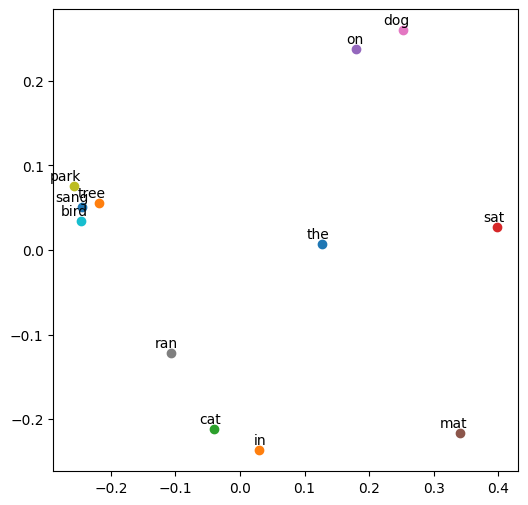

In [1]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, Lambda
from tensorflow.keras.preprocessing.text import Tokenizer
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Define the corpus
corpus = ['The cat sat on the mat',
          'The dog ran in the park',
          'The bird sang in the tree']

# Convert the corpus to a sequence of integers
tokenizer = Tokenizer()
tokenizer.fit_on_texts(corpus)
sequences = tokenizer.texts_to_sequences(corpus)
print("After converting the words in the corpus into a sequence of integers:")
print(sequences)

# Output will look like this:
# [[1, 3, 4, 5, 1, 6], [1, 7, 8, 2, 1, 9], [1, 10, 11, 2, 1, 12]]

# Define parameters
vocab_size = len(tokenizer.word_index) + 1  # Total vocabulary size
embedding_size = 10  # Dimension of the word embeddings
window_size = 2  # Context window size

# Generate context-target pairs
contexts = []
targets = []
for sequence in sequences:
    for i in range(window_size, len(sequence) - window_size):
        context = sequence[i - window_size:i] + sequence[i + 1:i + window_size + 1]
        target = sequence[i]
        contexts.append(context)
        targets.append(target)

# Convert the contexts and targets to numpy arrays
X = np.array(contexts)
y = np.array(targets)

# Define the CBOW model
model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=embedding_size, input_length=2 * window_size))
model.add(Lambda(lambda x: tf.reduce_mean(x, axis=1)))  # Average the embeddings of context words
model.add(Dense(units=vocab_size, activation='softmax'))  # Output layer
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy')

# Train the CBOW model
model.fit(X, y, epochs=100, verbose=0)

# Get the word embeddings from the trained model
embeddings = model.get_weights()[0]

# Perform PCA to reduce the dimensionality of the embeddings to 2D
pca = PCA(n_components=2)
reduced_embeddings = pca.fit_transform(embeddings)

# Visualize the embeddings
plt.figure(figsize=(6, 6))
for i, word in enumerate(tokenizer.word_index.keys()):
    x, y = reduced_embeddings[i]
    plt.scatter(x, y)
    plt.annotate(word, xy=(x, y), xytext=(5, 2), textcoords='offset points', ha='right', va='bottom')
plt.show()


### Output:

The code visualizes the **CBOW model's** word embeddings. You will see a 2D scatter plot where words that appear in similar contexts are placed close to each other. Words such as *cat*, *dog*, *mat*, and *park* should cluster together based on their contextual similarities.

### Notes:

- **CBOW Model:** This model uses the surrounding words (context) to predict the target word. It takes in multiple context words (in this case, two on either side of the target word) and outputs the target word based on the context.
  
- **Visualization:** We use **PCA** to reduce the dimensionality of the embeddings to 2D for visualization purposes. This allows us to see how similar words are grouped together based on their learned embeddings.

This implementation uses the TensorFlow and Keras libraries to demonstrate a basic CBOW model for word embeddings.

**Principal Component Analysis (PCA)** is a widely used dimensionality reduction technique that transforms high-dimensional data into a lower-dimensional space while preserving as much of the original data's variance as possible. It is commonly used in data preprocessing, especially for visualization, noise reduction, and feature extraction in machine learning.

### Key Concepts in PCA:
1. **Variance**: PCA focuses on the directions in which the data varies the most. These directions are known as **principal components**.
2. **Principal Components**: These are new axes that are orthogonal (uncorrelated) and ordered by the amount of variance in the data they capture. The first principal component captures the most variance, the second captures the second-most, and so on.
3. **Dimensionality Reduction**: By projecting data onto the first few principal components, PCA reduces the number of dimensions while retaining most of the information. This is useful for visualization and simplifying complex data.

### How PCA Works:
1. **Standardization**: PCA usually begins by standardizing the data (i.e., making sure the mean of each feature is 0 and the standard deviation is 1) to ensure that each feature contributes equally.
   
2. **Covariance Matrix**: PCA computes the covariance matrix of the data, which captures how features vary with respect to each other.

3. **Eigenvalues and Eigenvectors**: PCA then computes the eigenvalues and eigenvectors of the covariance matrix. The eigenvectors represent the principal components (i.e., the new axes), and the eigenvalues represent the amount of variance captured by each principal component.

4. **Projection**: The data is projected onto the first few principal components (those with the largest eigenvalues). These projections represent the data in the lower-dimensional space.

### Why PCA is Important:
- **Dimensionality Reduction**: PCA reduces the number of features in the data, making it easier to process while retaining most of the important information.
- **Data Visualization**: By reducing high-dimensional data to two or three dimensions, PCA helps visualize complex datasets. This is particularly useful in machine learning when we want to understand the structure of the data.
- **Noise Reduction**: PCA can help reduce noise by discarding components with small variance, which are often associated with noise.

### Example of PCA in CBOW:

In the example provided, after training the **CBOW model**, the learned word embeddings have multiple dimensions (in this case, 10-dimensional vectors). However, visualizing 10-dimensional data is challenging. To solve this, we use **PCA** to reduce the dimensionality of the embeddings to 2D, making it possible to plot and visualize the embeddings in a 2D space.

```python
pca = PCA(n_components=2)
reduced_embeddings = pca.fit_transform(embeddings)
```

Here, `n_components=2` reduces the embedding space from 10 dimensions to 2 dimensions. This allows us to scatter plot the words in a 2D space while retaining the essential relationships between them based on their proximity in the reduced space.

Yes, while **Principal Component Analysis (PCA)** is a widely used and straightforward method for dimensionality reduction, there are more complex techniques that can be used for visualizing high-dimensional embeddings. These methods often provide better insight into the structure of the data and relationships between points. Here are some alternatives to PCA:

### 1. **t-Distributed Stochastic Neighbor Embedding (t-SNE)**

**t-SNE** is a nonlinear dimensionality reduction technique specifically designed for visualization. It emphasizes preserving local structure and clustering similar points together, making it more suitable for visualizing word embeddings than PCA in many cases.

#### How t-SNE Works:
- t-SNE calculates the probability that two points in high-dimensional space are close neighbors. It then attempts to preserve those probabilities when mapping the data to a lower-dimensional space.
- Unlike PCA, t-SNE focuses on maintaining local similarities (i.e., similar words or points will remain close together), but it does not emphasize preserving global structure as much.
- It is especially useful for visualizing complex datasets where patterns might not be linearly separable.

#### Example Code Using t-SNE:

```python
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Perform t-SNE to reduce dimensionality to 2D
tsne = TSNE(n_components=2, random_state=42)
reduced_embeddings_tsne = tsne.fit_transform(embeddings)

# Visualize the embeddings using t-SNE
plt.figure(figsize=(6, 6))
for i, word in enumerate(tokenizer.word_index.keys()):
    x, y = reduced_embeddings_tsne[i]
    plt.scatter(x, y)
    plt.annotate(word, xy=(x, y), xytext=(5, 2), textcoords='offset points', ha='right', va='bottom')
plt.title("Word Embeddings Visualization using t-SNE")
plt.show()
```

### 2. **Uniform Manifold Approximation and Projection (UMAP)**

**UMAP** is another nonlinear dimensionality reduction technique that has gained popularity due to its scalability and ability to capture both local and global structure better than t-SNE in some cases. It is particularly useful for visualizing embeddings of larger datasets.

#### How UMAP Works:
- UMAP constructs a high-dimensional graph based on nearest neighbors, and then optimizes the graph in a low-dimensional space.
- UMAP has the advantage of being faster than t-SNE and can better capture global structure while preserving local structure.
  
#### Example Code Using UMAP:

```python
import umap
import matplotlib.pyplot as plt

# Perform UMAP to reduce dimensionality to 2D
umap_reducer = umap.UMAP(n_components=2, random_state=42)
reduced_embeddings_umap = umap_reducer.fit_transform(embeddings)

# Visualize the embeddings using UMAP
plt.figure(figsize=(6, 6))
for i, word in enumerate(tokenizer.word_index.keys()):
    x, y = reduced_embeddings_umap[i]
    plt.scatter(x, y)
    plt.annotate(word, xy=(x, y), xytext=(5, 2), textcoords='offset points', ha='right', va='bottom')
plt.title("Word Embeddings Visualization using UMAP")
plt.show()
```

### 3. **Self-Organizing Maps (SOM)**

A **Self-Organizing Map (SOM)** is a type of artificial neural network used for dimensionality reduction and clustering. SOM can visualize high-dimensional data in a lower-dimensional grid and help in clustering similar word embeddings.

#### How SOM Works:
- SOM uses unsupervised learning to map high-dimensional data onto a 2D grid while preserving the topological relationships.
- It can reveal clusters and groupings in the word embeddings in a 2D representation, showing how words relate to each other spatially.

SOM is less common in modern NLP visualization, but it is still an option for more exploratory visualizations.

### 4. **Multidimensional Scaling (MDS)**

**MDS** is another dimensionality reduction technique that preserves the pairwise distances between data points in the high-dimensional space. It attempts to represent those distances as faithfully as possible in lower dimensions.

#### How MDS Works:
- MDS calculates the pairwise dissimilarities between points in high-dimensional space and tries to preserve those distances in a low-dimensional representation.
  
MDS is useful when you want to visualize distances or dissimilarities between words explicitly.

#### Example Code Using MDS:

```python
from sklearn.manifold import MDS

# Perform MDS to reduce dimensionality to 2D
mds = MDS(n_components=2, random_state=42)
reduced_embeddings_mds = mds.fit_transform(embeddings)

# Visualize the embeddings using MDS
plt.figure(figsize=(6, 6))
for i, word in enumerate(tokenizer.word_index.keys()):
    x, y = reduced_embeddings_mds[i]
    plt.scatter(x, y)
    plt.annotate(word, xy=(x, y), xytext=(5, 2), textcoords='offset points', ha='right', va='bottom')
plt.title("Word Embeddings Visualization using MDS")
plt.show()
```

### Comparison of Techniques:
- **PCA**: Simple, fast, and linear. Good for retaining global structure but may not capture local nuances.
- **t-SNE**: Nonlinear, excels at preserving local structure. Great for visualizing clusters of similar points but not good at retaining global relationships.
- **UMAP**: Nonlinear, scalable, preserves both local and global structure. Faster than t-SNE and often provides better global context.
- **SOM**: Clusters data into a 2D grid and shows relationships between clusters.
- **MDS**: Preserves distances between points, useful for visualizing dissimilarities explicitly.

### When to Use Each Method:
- Use **PCA** when you want a fast, linear reduction with an emphasis on global structure.
- Use **t-SNE** when you're interested in visualizing clusters or local structure within the embeddings.
- Use **UMAP** if you want both local and global structure to be preserved, especially for larger datasets.
- Use **SOM** if you're interested in topological groupings and clustering.
- Use **MDS** when the distances between words are of primary importance.

These methods, when applied to word embeddings, can offer deeper insights into how similar words are grouped and what relationships exist between them.

Epoch 1/50


/usr/local/Cellar/jupyterlab/4.2.5_1/libexec/lib/python3.12/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 494ms/step - loss: 2.5648
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 2.5617
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 2.5586
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 2.5555
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 2.5524
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 2.5493
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 2.5461
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 2.5430
Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 2.5399
Epoch 10/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 2.5368
Epoch 11/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 2.5336
Epoch 12/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 2.5305
Epoch 13/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 2.5273
Epoch 14/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 2.5242
Epoch 15/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 2.5210
Epoch 16/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms

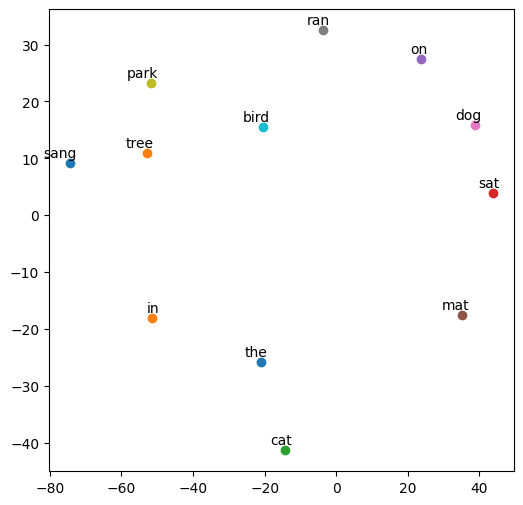

In [3]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, Lambda
from tensorflow.keras.preprocessing.text import Tokenizer
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

# Define the corpus
corpus = ['The cat sat on the mat', 'The dog ran in the park', 'The bird sang in the tree']

# Tokenize the text
tokenizer = Tokenizer()
tokenizer.fit_on_texts(corpus)
sequences = tokenizer.texts_to_sequences(corpus)

# Define the parameters
vocab_size = len(tokenizer.word_index) + 1  # Total vocabulary size
embedding_size = 10  # Dimension of the word embeddings
window_size = 2  # Context window size

# Generate context-target pairs
contexts = []
targets = []
for sequence in sequences:
    for i in range(window_size, len(sequence) - window_size):
        context = sequence[i - window_size:i] + sequence[i + 1:i + window_size + 1]
        target = sequence[i]
        contexts.append(context)
        targets.append(target)

# Convert to numpy arrays
X = np.array(contexts)
Y = np.array(targets)

# Define the CBOW model
model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=embedding_size, input_length=2 * window_size))
model.add(Lambda(lambda x: tf.reduce_mean(x, axis=1)))
model.add(Dense(units=vocab_size, activation='softmax'))

# Train the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy')
model.fit(X, Y, epochs=50)

# Get the word embeddings
embeddings = model.get_weights()[0]

# Perform t-SNE to reduce dimensionality to 2D (reduce perplexity value)
tsne = TSNE(n_components=2, random_state=42, perplexity=2)
reduced_embeddings_tsne = tsne.fit_transform(embeddings)

# Visualize the embeddings using t-SNE
plt.figure(figsize=(6, 6))
for i, word in enumerate(tokenizer.word_index.keys()):
    x, y = reduced_embeddings_tsne[i]
    plt.scatter(x, y)
    plt.annotate(word, xy=(x, y), xytext=(5, 2), textcoords='offset points', ha='right', va='bottom')
plt.show()


These parameters play a key role in defining the **Continuous Bag of Words (CBOW)** model for learning word embeddings:

### 1. **`vocab_size`**:
- This is the total number of unique words in the vocabulary. It is determined based on the number of distinct words present in your text corpus, including any special tokens like padding or unknown tokens. 
- In this case, `tokenizer.word_index` is a dictionary mapping words to unique integers, and by adding `+1`, we include the padding token (if applicable) in the vocabulary size.

### 2. **`embedding_size`**:
- This is the dimensionality of the word embeddings you want to learn. Instead of representing each word as a one-hot vector (which is high-dimensional and sparse), we want to learn dense vector representations of words in a lower-dimensional space. 
- In this example, each word will be represented by a vector of length 10, which means the learned embeddings will have 10 dimensions.

### 3. **`window_size`**:
- The window size defines the number of words to the left and right of a target word that you will use to predict the target word. 
- A `window_size` of 2 means that the model will consider two words to the left and two words to the right of the target word as context for prediction.

For example, if your sentence is **"The cat sat on the mat"** with a `window_size` of 2, you would generate pairs like:
- **Context**: ["The", "sat"], **Target**: "cat"
- **Context**: ["cat", "on"], **Target**: "sat"
- **Context**: ["sat", "the"], **Target**: "on"

The model learns to predict the target word based on the surrounding context words, allowing it to capture the semantic relationships between words.

In the CBOW model, **context words** are used to predict the **target word** in a given context window, and the model learns the embeddings by optimizing this prediction task.

This approach helps capture the meaning of words based on their surrounding words, making it valuable for tasks such as sentiment analysis, machine translation, or text classification.

Certainly! Here is the rewritten explanation using LaTeX syntax with `$` or `$$` for equations in a CBOW context:

### Dense Vector Representation

Each word in the **Continuous Bag of Words (CBOW)** model (or any word embedding model like **Word2Vec**, **GloVe**, or **FastText**) is represented as a dense vector in a lower-dimensional space. This vector, known as an **embedding**, has dimensions defined by the **embedding size**. For instance, with an embedding size of 10, each word is represented by a 10-dimensional vector.

#### Dense Vector Representation

- **Dense** means the vector has non-zero values in most of its dimensions.
- **Vector Representation** means each word is transformed into a list (vector) of numbers capturing its meaning, usage, or context.

#### Example

Assume the word "cat" is represented by a 10-dimensional vector (embedding) after training:

$$
\text{cat} \rightarrow [0.12, -0.34, 0.88, -0.56, 0.15, 0.97, -0.11, 0.67, -0.44, 0.31]
$$

This vector does not explicitly represent properties like "animal" or "pet," but captures relationships "cat" has with other words like "dog" or "animal" in the training corpus. The vector values are learned during model training.

### How are Dense Vectors Learned?

In **CBOW**, word embeddings are trained by optimizing a predictive task. The model learns to predict a target word based on its surrounding context words. The training process adjusts the word vectors' values to minimize the difference between predicted and actual target words.

For example, given the sentence: "The cat is playing outside," CBOW learns the following relationships:

$$
\text{Context Words: [The, is, playing, outside]} \rightarrow \text{Predict Target Word: cat}
$$

The **objective function** can be mathematically represented as:

$$
\text{Embedding}(w) = \arg \min \left( \text{Loss}(w, \text{context}(w)) \right)
$$

This means that the embedding for word \( w \) is learned by minimizing the loss based on its context words.

### Visualizing Dense Vectors (Dimensionality Reduction)

Since visualizing high-dimensional vectors (e.g., 10D) is difficult, techniques like **PCA (Principal Component Analysis)** or **t-SNE** are used to reduce their dimensionality to 2D or 3D for visualization. This helps to observe word similarities.

#### Example

After training, the embeddings might look like this:
- **cat**: $ [0.12, -0.34, 0.88, \dots] $
- **dog**: $ [0.11, -0.33, 0.85, \dots] $
- **car**: $ [-0.67, 0.22, -0.12, \dots] $

When projected into 2D using PCA or t-SNE, words with similar meanings or contexts (like "cat" and "dog") will be closer in the plot, while unrelated words (like "car") will be farther apart.

### The Role of Embedding Size

The **embedding size** determines how much information the embedding captures. For example:
- **10 dimensions** may be sufficient for simple tasks.
- **100 dimensions** allow capturing more nuances and relationships between words, though too many dimensions can lead to overfitting or computational inefficiency.

### Why Dense Vectors are Useful
- They **encode semantic meaning**: Words with similar meanings are close in the vector space.
- Useful for tasks like **text classification**, **machine translation**, and **information retrieval**.
- More efficient than sparse representations (like one-hot encoding).

### Code Example in CBOW

Below is a Python implementation of CBOW using TensorFlow and Keras:

```python
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, Lambda
from tensorflow.keras.preprocessing.text import Tokenizer
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Define the corpus
corpus = ['The cat sat on the mat', 'The dog ran in the park', 'The bird sang in the tree']

# Tokenize the text
tokenizer = Tokenizer()
tokenizer.fit_on_texts(corpus)
sequences = tokenizer.texts_to_sequences(corpus)

# Define the parameters
vocab_size = len(tokenizer.word_index) + 1  # Total vocabulary size
embedding_size = 10  # Dimension of the word embeddings
window_size = 2  # Context window size

# Generate context-target pairs
contexts = []
targets = []
for sequence in sequences:
    for i in range(window_size, len(sequence) - window_size):
        context = sequence[i - window_size:i] + sequence[i + 1:i + window_size + 1]
        target = sequence[i]
        contexts.append(context)
        targets.append(target)

# Convert to numpy arrays
X = np.array(contexts)
Y = np.array(targets)

# Define the CBOW model
model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=embedding_size, input_length=2 * window_size))
model.add(Lambda(lambda x: tf.reduce_mean(x, axis=1)))
model.add(Dense(units=vocab_size, activation='softmax'))

# Train the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy')
model.fit(X, Y, epochs=50)

# Get the word embeddings
embeddings = model.get_weights()[0]

# Perform PCA to reduce dimensionality for visualization
pca = PCA(n_components=2)
reduced_embeddings = pca.fit_transform(embeddings)

# Visualize the word embeddings
plt.figure(figsize=(5, 5))
for i, word in enumerate(tokenizer.word_index.keys()):
    x, y = reduced_embeddings[i]
    plt.scatter(x, y)
    plt.annotate(word, xy=(x, y), xytext=(5, 2), textcoords='offset points', ha='right', va='bottom')
plt.show()
```

### Conclusion
In the CBOW model, each word is represented as a dense vector in a multi-dimensional space. These embeddings capture the meaning and relationships between words, which are essential for various NLP tasks like classification and translation.

2024-09-23 08:15:44.534737: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/50


/usr/local/Cellar/jupyterlab/4.2.5_1/libexec/lib/python3.12/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 515ms/step - loss: 2.5585
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 2.5554
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 2.5523
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 2.5492
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 2.5461
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 2.5430
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 2.5398
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 2.5367
Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 2.5336
Epoch 10/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 2.5304
Epoch 11/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 2.5273
Epoch 12/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 2.5241
Epoch 13/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 2.5209
Epoch 14/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 2.5177
Epoch 15/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 2.5146
Epoch 16/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms

/usr/local/Cellar/jupyterlab/4.2.5_1/libexec/lib/python3.12/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/Cellar/jupyterlab/4.2.5_1/libexec/lib/python3.12/site-packages/umap/umap_.py:2437: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


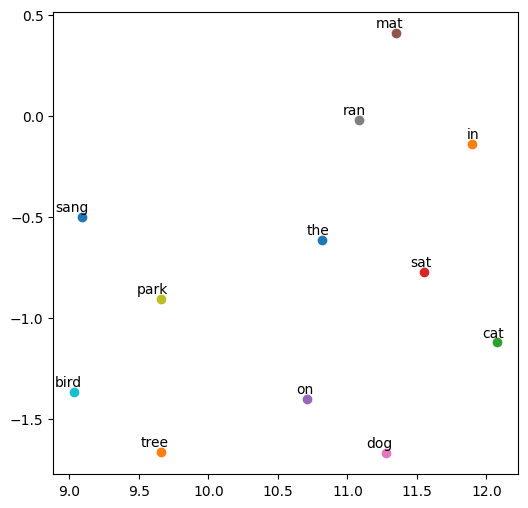

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, Lambda
from tensorflow.keras.preprocessing.text import Tokenizer
import numpy as np
import matplotlib.pyplot as plt
import umap.umap_ as umap  # Import UMAP from umap-learn

# Define the corpus
corpus = ['The cat sat on the mat', 'The dog ran in the park', 'The bird sang in the tree']

# Tokenize the text
tokenizer = Tokenizer()
tokenizer.fit_on_texts(corpus)
sequences = tokenizer.texts_to_sequences(corpus)

# Define the parameters
vocab_size = len(tokenizer.word_index) + 1  # Total vocabulary size
embedding_size = 10  # Dimension of the word embeddings
window_size = 2  # Context window size

# Generate context-target pairs
contexts = []
targets = []
for sequence in sequences:
    for i in range(window_size, len(sequence) - window_size):
        context = sequence[i - window_size:i] + sequence[i + 1:i + window_size + 1]
        target = sequence[i]
        contexts.append(context)
        targets.append(target)

# Convert to numpy arrays
X = np.array(contexts)
Y = np.array(targets)

# Define the CBOW model
model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=embedding_size, input_length=2 * window_size))
model.add(Lambda(lambda x: tf.reduce_mean(x, axis=1)))
model.add(Dense(units=vocab_size, activation='softmax'))

# Train the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy')
model.fit(X, Y, epochs=50)

# Get the word embeddings
embeddings = model.get_weights()[0]

# Perform UMAP to reduce dimensionality to 2D
umap_reducer = umap.UMAP(n_components=2, random_state=42)
reduced_embeddings_umap = umap_reducer.fit_transform(embeddings)

# Visualize the embeddings using UMAP
plt.figure(figsize=(6, 6))
for i, word in enumerate(tokenizer.word_index.keys()):
    x, y = reduced_embeddings_umap[i]
    plt.scatter(x, y)
    plt.annotate(word, xy=(x, y), xytext=(5, 2), textcoords='offset points', ha='right', va='bottom')
plt.show()


In [2]:
#pip install umap-learn

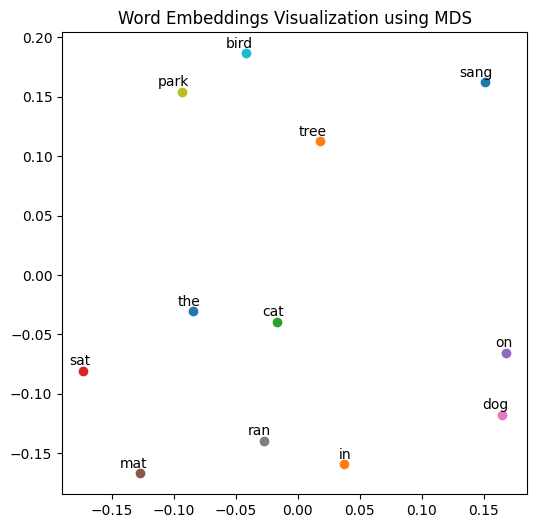

In [3]:
from sklearn.manifold import MDS

# Perform MDS to reduce dimensionality to 2D
mds = MDS(n_components=2, random_state=42)
reduced_embeddings_mds = mds.fit_transform(embeddings)

# Visualize the embeddings using MDS
plt.figure(figsize=(6, 6))
for i, word in enumerate(tokenizer.word_index.keys()):
    x, y = reduced_embeddings_mds[i]
    plt.scatter(x, y)
    plt.annotate(word, xy=(x, y), xytext=(5, 2), textcoords='offset points', ha='right', va='bottom')
plt.title("Word Embeddings Visualization using MDS")
plt.show()